# Environment Setting

### PIP install

* pandas sql

In [1]:
!pip install pandasql
!pip install wordcloud

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=2d080e39c82d31477a109cb103497817214d5da1b119b2dc42d6bcf46b8afc42
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


### Import packages

* Pandas
  * Process the dataset
* NLP
  * NLTK: Analyse the human language
  * Regex
  * WordCloud
* Plot
  * matplotlib
  * seaborn

In [2]:
import pandas as pd
import pandasql as ps
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
nltk.download('punkt')
import seaborn as sns
import re
import wordcloud
from collections import Counter
import matplotlib.pyplot as plt 

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Load dataset from google drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/Shareddrives/CIS545_Final_Project/dataset

/content/drive/Shareddrives/CIS545_Final_Project/dataset


Access the following dataset
* tweet dataset
* News dataset

In [5]:
tweet_df = pd.read_csv('tweet_2015/Tweet.csv')
tweet_company_relation_df = pd.read_csv('tweet_2015/Company_Tweet.csv')
tweet_company_symbol_df = pd.read_csv('tweet_2015/Company.csv')

In [6]:
news_df = pd.read_json('news/News_Category_Dataset_v2.json', lines=True)
# Discard abc_news_df
abc_news_df = pd.read_csv('news/abcnews-date-text.csv')

In [7]:
# https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
# Historical Dataset: more data for stock analysis (discard sp_500_df)
stock_price_df = pd.read_csv('financial/stock_prices_latest.csv')

In [8]:
# https://www.kaggle.com/tomasmantero/top-tech-companies-stock-price
# Use the relationship between company name and ticker symbol (not using the sector)
company_ticker_relation_df = pd.read_csv('sp_500/company_sector.csv')

In [9]:
# https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018
# Financial Indicator (2016) > for finding sector
sector_relation_df = pd.read_csv('financial/2016_Financial_Data.csv')

# Process the Dataset

## Show all dataset

In [10]:
tweet_df

tweet_id           writer  ...  retweet_num like_num
0         550441509175443456  VisualStockRSRC  ...            0        1
1         550441672312512512      KeralaGuy77  ...            0        0
2         550441732014223360      DozenStocks  ...            0        0
3         550442977802207232     ShowDreamCar  ...            0        1
4         550443807834402816     i_Know_First  ...            0        1
...                      ...              ...  ...          ...      ...
3717959  1212159765914079234        TEEELAZER  ...            0        6
3717960  1212159838882533376    ShortingIsFun  ...            0        1
3717961  1212160015332728833      Commuternyc  ...            0        5
3717962  1212160410692046849      MoriaCrypto  ...            0        1
3717963  1212160477159206912         treabase  ...            0        0

[3717964 rows x 7 columns]

In [11]:
tweet_df.dtypes

tweet_id        int64
writer         object
post_date       int64
body           object
comment_num     int64
retweet_num     int64
like_num        int64
dtype: object

In [12]:
tweet_company_relation_df

tweet_id ticker_symbol
0         550803612197457920          AAPL
1         550803610825928706          AAPL
2         550803225113157632          AAPL
3         550802957370159104          AAPL
4         550802855129382912          AAPL
...                      ...           ...
4336440  1212158772015034369          TSLA
4336441  1212159099632267268          TSLA
4336442  1212159184931717120          TSLA
4336443  1212159838882533376          TSLA
4336444  1212160015332728833          TSLA

[4336445 rows x 2 columns]

In [13]:
tweet_company_symbol_df

ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc
5          MSFT    Microsoft

In [14]:
news_df

category  ...       date
0               CRIME  ... 2018-05-26
1       ENTERTAINMENT  ... 2018-05-26
2       ENTERTAINMENT  ... 2018-05-26
3       ENTERTAINMENT  ... 2018-05-26
4       ENTERTAINMENT  ... 2018-05-26
...               ...  ...        ...
200848           TECH  ... 2012-01-28
200849         SPORTS  ... 2012-01-28
200850         SPORTS  ... 2012-01-28
200851         SPORTS  ... 2012-01-28
200852         SPORTS  ... 2012-01-28

[200853 rows x 6 columns]

In [15]:
news_df.dtypes

category                     object
headline                     object
authors                      object
link                         object
short_description            object
date                 datetime64[ns]
dtype: object

In [16]:
abc_news_df

publish_date                                      headline_text
0            20030219  aba decides against community broadcasting lic...
1            20030219     act fire witnesses must be aware of defamation
2            20030219     a g calls for infrastructure protection summit
3            20030219           air nz staff in aust strike for pay rise
4            20030219      air nz strike to affect australian travellers
...               ...                                                ...
1226253      20201231  what abc readers learned from 2020 looking bac...
1226254      20201231  what are the south african and uk variants of ...
1226255      20201231  what victorias coronavirus restrictions mean f...
1226256      20201231  whats life like as an american doctor during c...
1226257      20201231  womens shed canberra reskilling unemployed pan...

[1226258 rows x 2 columns]

In [17]:
abc_news_df.dtypes

publish_date      int64
headline_text    object
dtype: object

In [18]:
company_ticker_relation_df

Symbol                    Name                  Sector
0      MMM              3M Company             Industrials
1      AOS         A.O. Smith Corp             Industrials
2      ABT     Abbott Laboratories             Health Care
3     ABBV             AbbVie Inc.             Health Care
4     ABMD             ABIOMED Inc             Health Care
..     ...                     ...                     ...
500    YUM         Yum! Brands Inc  Consumer Discretionary
501   ZBRA      Zebra Technologies  Information Technology
502    ZBH  Zimmer Biomet Holdings             Health Care
503   ZION           Zions Bancorp              Financials
504    ZTS                  Zoetis             Health Care

[505 rows x 3 columns]

In [19]:
sector_relation_df

Unnamed: 0       Revenue  ...  2017 PRICE VAR [%]  Class
0            PG  6.529900e+10  ...           12.532463      1
1          VIPS  8.148496e+09  ...            4.363319      1
2            KR  1.098300e+11  ...          -17.068252      0
3           RAD  2.077024e+10  ...          -75.916870      0
4           GIS  1.656310e+10  ...           -1.162942      0
...         ...           ...  ...                 ...    ...
4792       TSRI  6.099828e+07  ...            0.655807      1
4793       TZOO  1.142630e+08  ...          -35.500002      0
4794      USATP  7.700000e+07  ...           14.840183      1
4795       WSTG  1.646090e+08  ...           -2.854095      0
4796        WTT  3.132700e+07  ...           29.946527      1

[4797 rows x 225 columns]

In [20]:
stock_price_df

symbol        date  ...     volume  split_coefficient
0          MSFT  2016-05-16  ...   20032017                1.0
1          MSFT  2002-01-16  ...   30977700                1.0
2          MSFT  2001-09-18  ...   41591300                1.0
3          MSFT  2007-10-26  ...  288121200                1.0
4          MSFT  2014-06-27  ...   74640000                1.0
...         ...         ...  ...        ...                ...
24395011     HA  2021-06-03  ...    1287065                1.0
24395012     HA  2021-06-04  ...     993843                1.0
24395013     HA  2021-06-10  ...    2402349                1.0
24395014     HA  2021-06-07  ...     514048                1.0
24395015     HA  2021-06-11  ...    6595595                1.0

[24395016 rows x 9 columns]

In [21]:
stock_price_df.dtypes

symbol                object
date                  object
open                 float64
high                 float64
low                  float64
close                float64
close_adjusted       float64
volume                 int64
split_coefficient    float64
dtype: object

## Filter Sector dataset

Before doing data analysis, we create a sector dataframe for further categorization.

Here we use sector_relation_df instead of company_ticker_relation_df since the former dataset has more company



In [22]:
sector_relation_df = sector_relation_df.rename(columns={"Unnamed: 0": "Symbol"})
sector_relation_df = sector_relation_df[['Symbol', 'Sector']]

In [23]:
sector_relation_df

Symbol              Sector
0        PG  Consumer Defensive
1      VIPS  Consumer Defensive
2        KR  Consumer Defensive
3       RAD  Consumer Defensive
4       GIS  Consumer Defensive
...     ...                 ...
4792   TSRI          Technology
4793   TZOO          Technology
4794  USATP          Technology
4795   WSTG          Technology
4796    WTT          Technology

[4797 rows x 2 columns]

## Observe News dataset

Before we start to analyze, we need to manually set what companies we want to analyze. The information we need is the dictionary of ticker symbol with company name

In [24]:
company_ticker_relation_df

Symbol                    Name                  Sector
0      MMM              3M Company             Industrials
1      AOS         A.O. Smith Corp             Industrials
2      ABT     Abbott Laboratories             Health Care
3     ABBV             AbbVie Inc.             Health Care
4     ABMD             ABIOMED Inc             Health Care
..     ...                     ...                     ...
500    YUM         Yum! Brands Inc  Consumer Discretionary
501   ZBRA      Zebra Technologies  Information Technology
502    ZBH  Zimmer Biomet Holdings             Health Care
503   ZION           Zions Bancorp              Financials
504    ZTS                  Zoetis             Health Care

[505 rows x 3 columns]

In [25]:
company_name_symbol_df = company_ticker_relation_df.copy()

# Remove redundant words with regex
company_name_symbol_df['Name'].replace(to_replace=r'\W+\(.+?\)\W*', value='', regex=True, inplace=True)
company_name_symbol_df['Name'].replace(to_replace=r'\W+Inc\W*', value='', regex=True, inplace=True)
company_name_symbol_df['Name'].replace(to_replace=r'\W+[Pp][Ll][Cc]\W*', value='', regex=True, inplace=True)
company_name_symbol_df['Name'].replace(to_replace=r'\W+[Ll][Tt][Dd]\W*', value='', regex=True, inplace=True)
company_name_symbol_df['Name'].replace(to_replace=r'\W+Corp\W*', value='', regex=True, inplace=True)
company_name_symbol_df['Name'].replace(to_replace=r'\W+Company\W*', value='', regex=True, inplace=True)
company_name_symbol_df['Name'].replace(to_replace=r'\W+Co\W*', value='', regex=True, inplace=True)
company_name_symbol_df['Name'].replace(to_replace=r'\.com$', value='', regex=True, inplace=True)
company_name_symbol_df['Name'].replace(to_replace=r'\W+Group\W*', value='', regex=True, inplace=True)
company_name_symbol_df['Name'].replace(to_replace=r'\W+Int\'l', value='', regex=True, inplace=True)
company_name_symbol_df['Name'].replace(to_replace=r'\'s', value='', regex=True, inplace=True)

# Convert dataframe to dictionary
ticker_dict = company_name_symbol_df.set_index('Symbol')['Name'].to_dict()

# Manually adjustment
ticker_dict['GOOG'] = 'Google'
ticker_dict['MMM'] = ' 3M '
ticker_dict['KO'] = 'Cola'
ticker_dict['QCOM'] = 'Qualcomm'
del ticker_dict['GOOGL']

# Extract company name and ticker symbol as lists
companies_list = list(ticker_dict.values())
companies_ticker_list = list(ticker_dict.keys())

### Assign Company's Name

Purpose: We need to assign each rows to the corresponding company (or companies)

For filtering the substring, we use two method:

*  Pandas SQL

We use ``LIKE`` keyword to find the corresponding company of the headline or short description. 

Once finishing a company, store the result into ``temp_df``, and then append it to ``news_12_18_companies_df``

However, it's too slow.

* ``pandas.str.contains()``

Therefore, we choose the pandas built-in function: ``contains()`` to filter the headline and short description by company's name

In [26]:
news_12_18_companies_df = pd.DataFrame(columns=['date', 'headline', 'short_description', 'company'])
news_company_count_df = pd.DataFrame(columns=['company', 'count'])
news_company_count_dict = {}

for idx, (company, symbol) in enumerate(zip(companies_list, companies_ticker_list)):
    temp_df = news_df[news_df['headline'].str.contains(company) | news_df['short_description'].str.contains(company)]
    news_count = temp_df.shape[0]

    print('Progress (' + str(idx+1) + '/' + str(len(companies_list)) + '): ' + company + ' > ' + str(news_count))
    temp_df['company'] = company
    temp_df['symbol'] = symbol
    news_12_18_companies_df = news_12_18_companies_df.append(temp_df, ignore_index=True)
    if news_count > 0:
        news_company_count_dict[company] = news_company_count_dict.get(company, 0) + news_count

for company, count in news_company_count_dict.items():
    news_company_count_df = news_company_count_df.append({'company': company, 'count': count}, ignore_index=True)

Progress (1/504):  3M  > 0
Progress (2/504): A.O. Smith > 0
Progress (3/504): Abbott Laboratories > 0
Progress (4/504): AbbVie > 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Progress (5/504): ABIOMED > 0
Progress (6/504): Accenture > 3
Progress (7/504): Activision Blizzard > 1
Progress (8/504): Adobe > 9
Progress (9/504): Advance Auto Parts > 0
Progress (10/504): Advanced Micro Devices > 0
Progress (11/504): AES > 0
Progress (12/504): AFLAC > 0
Progress (13/504): Agilent Technologies > 0
Progress (14/504): Air Products & Chemicals > 0
Progress (15/504): Akamai Technologies > 0
Progress (16/504): Alaska Air > 11
Progress (17/504): Albemarle > 0
Progress (18/504): Alexandria Real Estate Equities > 0
Progress (19/504): Alexion Pharmaceuticals > 0
Progress (20/504): Align Technology > 0
Progress (21/504): Allegion > 0
Progress (22/504): Alliant Energy > 0
Progress (23/504): Allstate > 7
Progress (24/504): Google > 522
Progress (25/504): Altria > 1
Progress (26/504): Amazon > 324
Progress (27/504): Amcor > 0
Progress (28/504): Ameren > 0
Progress (29/504): American Airlines > 57
Progress (30/504): American Electric Power > 0
Progress (31/504): American Express 

Here, we draw a bar plot to see the distribution of the number of news for those top 30 companies

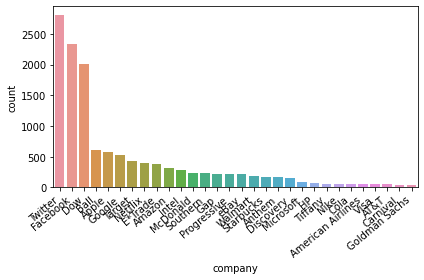

In [27]:
news_company_count_df = news_company_count_df.sort_values(by=['count'], ascending=[False])
news_company_count_df = news_company_count_df.head(30)
news_company_count_barplot = sns.barplot(x='company', y='count', data=news_company_count_df, ci=None)
news_company_count_barplot.set_xticklabels(labels=news_company_count_barplot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [28]:
news_12_18_companies_df

date  ... symbol
0     2014-04-09  ...   ABBV
1     2013-12-08  ...   ABBV
2     2013-04-23  ...   ABBV
3     2013-03-02  ...   ABBV
4     2016-06-01  ...    ACN
...          ...  ...    ...
13909 2013-12-14  ...     WU
13910 2017-02-13  ...    WHR
13911 2015-12-06  ...    WHR
13912 2012-12-03  ...    WHR
13913 2018-02-07  ...   WYNN

[13914 rows x 8 columns]

### Sentiment Analysis

After assigning the label, we would implement sentiment analyzer by using existing nltk package



In [29]:
def sentimentAnalysis(df):
    sia = nltk.sentiment.SentimentIntensityAnalyzer()
    result_headline = sia.polarity_scores(df['headline'])
    result_body = sia.polarity_scores(df['short_description'])
    df['headline_neg'] = result_headline['neg']
    df['headline_neu'] = result_headline['neu']
    df['headline_pos'] = result_headline['pos']
    df['headline_compound'] = result_headline['compound']
    df['body_neg'] = result_body['neg']
    df['body_neu'] = result_body['neu']
    df['body_pos'] = result_body['pos']
    df['body_compound'] = result_body['compound']
    return df

In [30]:
news_12_18_companies_df = news_12_18_companies_df.apply(sentimentAnalysis, axis=1)

In [31]:
news_12_18_companies_df

date  ... body_compound
0     2014-04-09  ...        0.3612
1     2013-12-08  ...        0.0000
2     2013-04-23  ...       -0.2500
3     2013-03-02  ...        0.4019
4     2016-06-01  ...        0.8316
...          ...  ...           ...
13909 2013-12-14  ...        0.9214
13910 2017-02-13  ...       -0.3400
13911 2015-12-06  ...       -0.2960
13912 2012-12-03  ...        0.1007
13913 2018-02-07  ...       -0.8271

[13914 rows x 16 columns]

### Aggregate Compound Score

After implementing sentiment analysis, we would treat **compound score** as our result since this score combines negative, neutral and positive words together.

We need to group by ``['date']``, ``['company']`` and ``['symbol']`` to aggregate the sum of compound score for headline and body separately since chances are that there are multiple news about the same company at the same day

In [32]:
news_12_18_companies_compound_df = news_12_18_companies_df[['date', 'company', 'headline_compound', 'body_compound', 'symbol']].groupby(['date', 'company', 'symbol']).sum().reset_index()

### Assign Sector

After aggregattion, we join the dataframe on ``sector_relation_df `` to assign the corresponding sectors.

We want to see if the patterns of wordcloud are related to sectors.

* ``news_12_18_companies_compound_df``: For stock price prediction
* ``news_12_18_companies_text_df``: For plotting wordcloud

In [33]:
news_compound_sector_query = '''
SELECT news.date, news.company, news.symbol, news.headline_compound, news.body_compound, sector.Sector AS sector
  FROM news_12_18_companies_compound_df AS news
JOIN sector_relation_df AS sector
  ON news.symbol = sector.Symbol
'''

news_12_18_companies_compound_df = ps.sqldf(news_compound_sector_query)

In [34]:
news_12_18_companies_text_df = news_12_18_companies_df[['company', 'headline', 'short_description', 'symbol']]

news_text_sector_query = '''
SELECT news.company, news.symbol, news.headline, news.short_description, sector.Sector AS sector
  FROM news_12_18_companies_df AS news
JOIN sector_relation_df AS sector
  ON news.symbol = sector.Symbol
'''

news_12_18_companies_text_df = ps.sqldf(news_text_sector_query)

In [35]:
news_12_18_companies_text_df

company  ...              sector
0             AbbVie  ...          Healthcare
1             AbbVie  ...          Healthcare
2             AbbVie  ...          Healthcare
3             AbbVie  ...          Healthcare
4          Accenture  ...          Technology
...              ...  ...                 ...
11881  Western Union  ...  Financial Services
11882      Whirlpool  ...          Technology
11883      Whirlpool  ...          Technology
11884      Whirlpool  ...          Technology
11885   Wynn Resorts  ...   Consumer Cyclical

[11886 rows x 5 columns]

In [36]:
news_12_18_companies_compound_df

date  ...                  sector
0     2012-01-28 00:00:00.000000  ...  Communication Services
1     2012-01-28 00:00:00.000000  ...              Technology
2     2012-01-28 00:00:00.000000  ...      Financial Services
3     2012-01-28 00:00:00.000000  ...              Technology
4     2012-01-28 00:00:00.000000  ...      Consumer Defensive
...                          ...  ...                     ...
8543  2018-05-25 00:00:00.000000  ...              Technology
8544  2018-05-25 00:00:00.000000  ...      Financial Services
8545  2018-05-26 00:00:00.000000  ...              Technology
8546  2018-05-26 00:00:00.000000  ...       Consumer Cyclical
8547  2018-05-26 00:00:00.000000  ...              Technology

[8548 rows x 6 columns]

## WordCloud of the News

Steps:

1. Clean the texts
2. Tokenize the texts
3. Concatenate the words
4. Plot the wordCloud

Plot:

* Wordcloud
* Barplot

In [37]:
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
COMMON_WORD_COUNT = 20

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [38]:
def tokenized_content(content, companies):
  result = []
  companies_lower = set([name.lower() for name in companies])
  for single in content:
    for w in nltk.word_tokenize(single):
      w = w.lower()
      if w in companies_lower:
        continue
      if w not in stopwords and w.isalpha():
        result.append(w)

  return result

In [39]:
def draw_words_barplot_from_list(x_list, y_list, title):

    words_top_df = pd.DataFrame(list(zip(x_list, y_list)), columns =['word', 'count'])
    words_top_df = words_top_df.sort_values(by=['count'], ascending=[False])
    words_top_barplot = sns.barplot(x='word', y='count', data=words_top_df, ci=None)
    words_top_barplot.set_xticklabels(labels=words_top_barplot.get_xticklabels(), rotation=40, ha="right")
    plt.title(title, fontsize=30)
    plt.tight_layout()
    plt.show()

In [40]:
def draw_wordcloud(df, col, companies, plot_title):
    plot_title = "Sector: " + plot_title

    # Convert dataframe to list
    contents = df[col].values.tolist()

    # Tokenize the contents (and filter the names of companies)
    contents_tokens = tokenized_content(contents, companies)
    contents_most_common_count = Counter(contents_tokens)

    # Draw the barplot of word frequencies
    words_top = []
    words_top_count = []
    contents_words_top = contents_most_common_count.most_common(10)
    for (word, count) in contents_words_top:
        words_top.append(word)
        words_top_count.append(count)
    draw_words_barplot_from_list(words_top, words_top_count, plot_title)

    # Concatenate words in contents
    contents_word_cloud = ""
    contents_words = [w[0] for w in contents_most_common_count.most_common()]
    contents_word_cloud += " ".join(contents_words) + ""

    # Plot the wordcloud
    word_cloud = wordcloud.WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(contents_word_cloud)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(plot_title, fontsize=30)
    plt.tight_layout(pad = 0)
    
    plt.show()

### Headline / Short Description

Headline: 


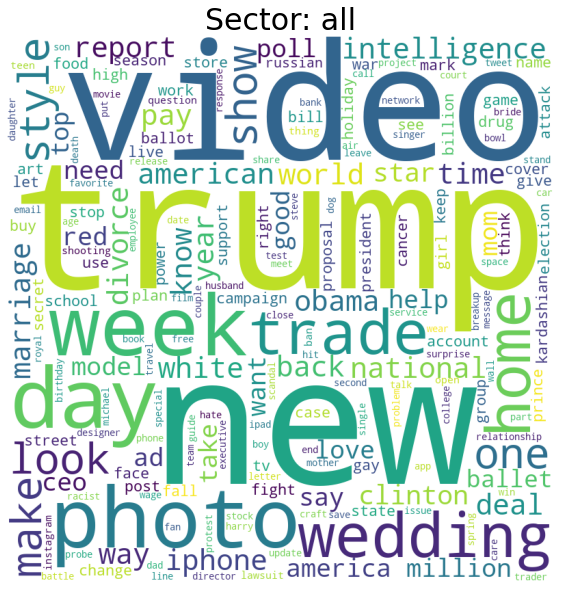

Short Description: 


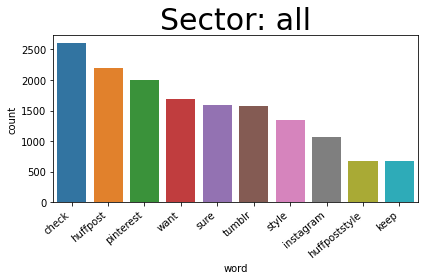

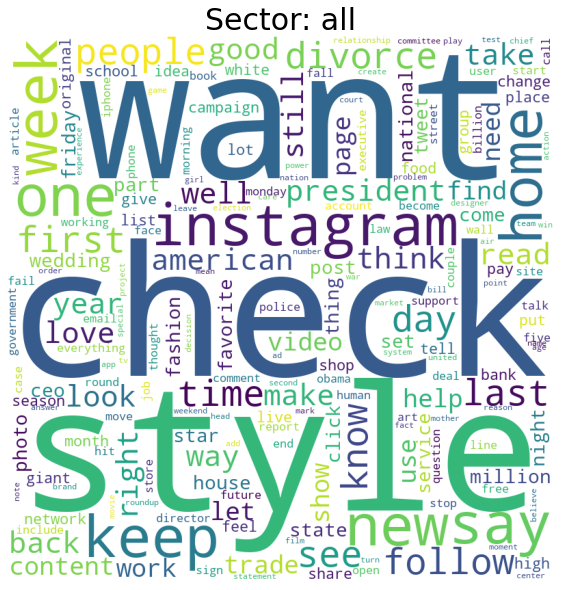

In [41]:
print('Headline: ')
draw_wordcloud(news_12_18_companies_text_df, 'headline', companies_list, 'all')
print('Short Description: ')
draw_wordcloud(news_12_18_companies_text_df, 'short_description', companies_list, 'all')

### Sectors from Headline

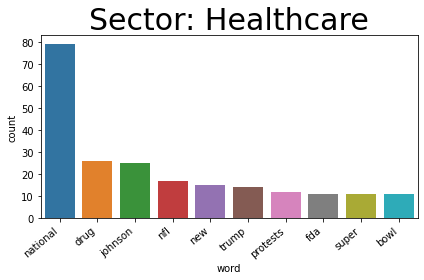

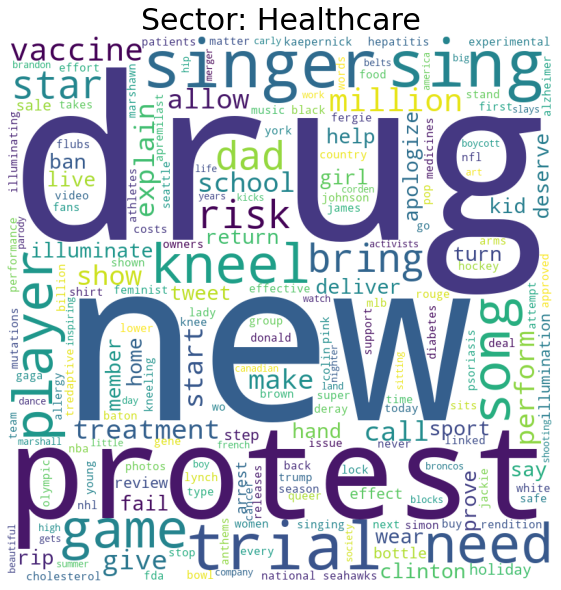

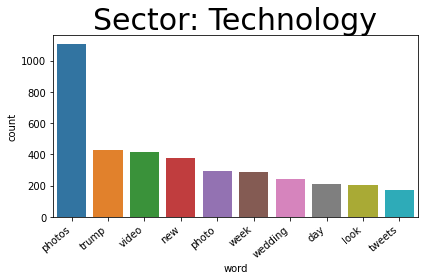

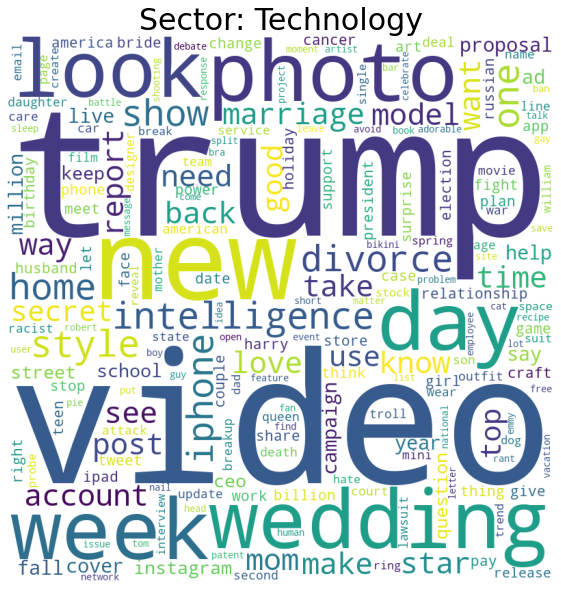

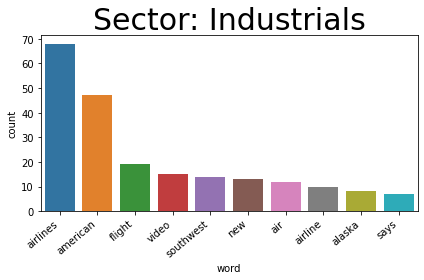

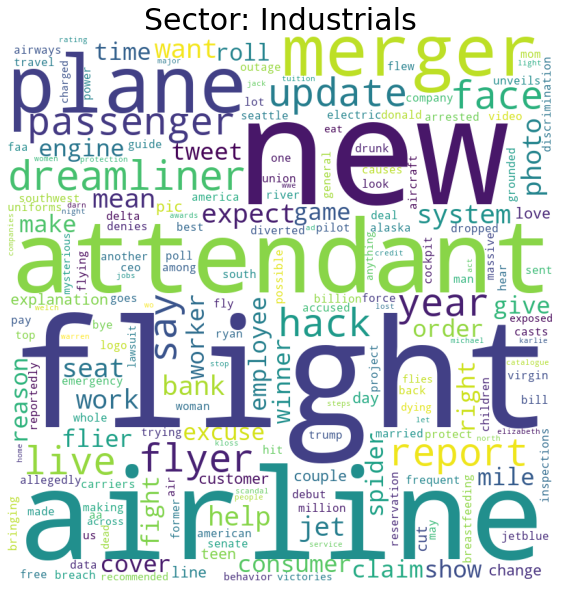

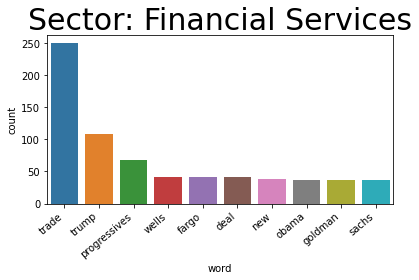

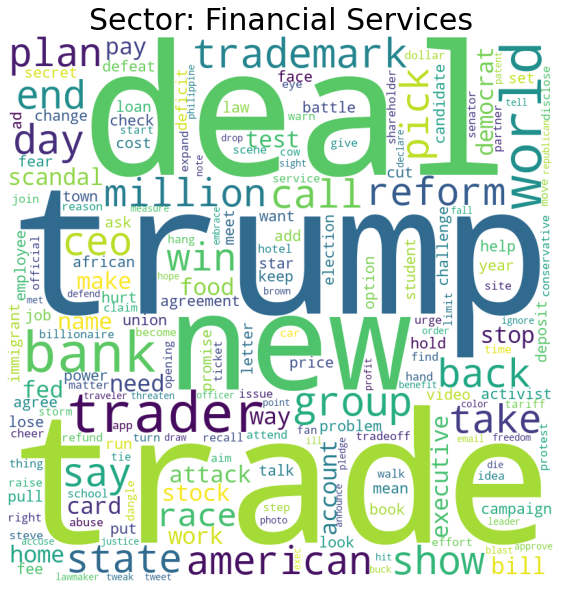

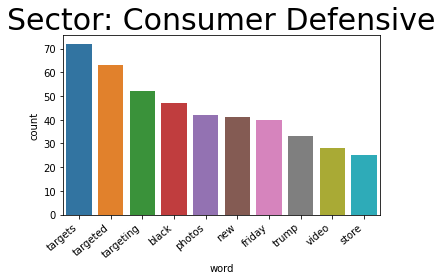

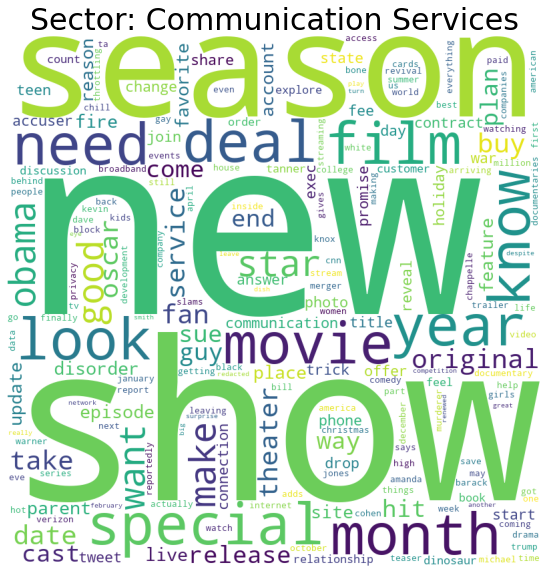

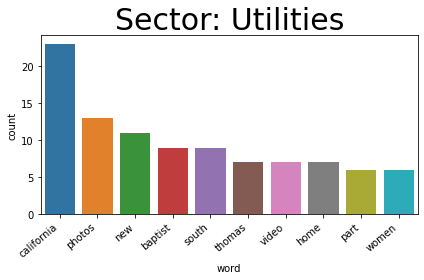

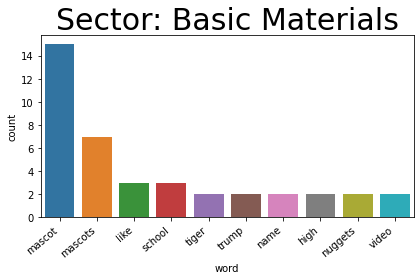

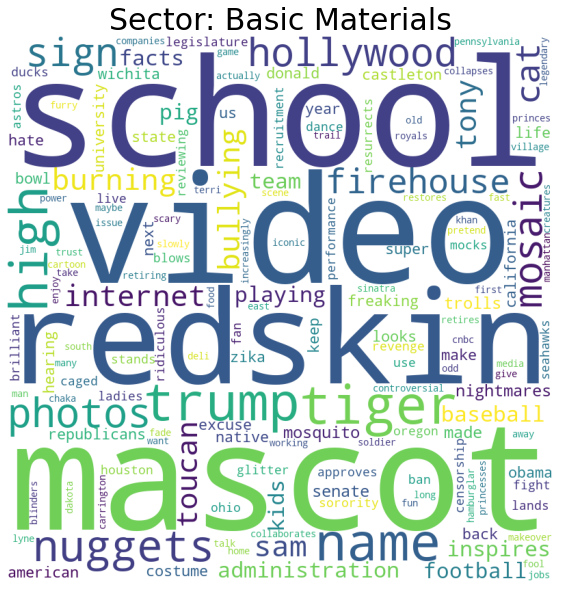

In [42]:
filtered_sectors = news_12_18_companies_text_df['sector'].unique()

for sector in filtered_sectors:
    news_12_18_sectors_df = news_12_18_companies_text_df[news_12_18_companies_text_df['sector'] == sector]
    draw_wordcloud(news_12_18_sectors_df, 'headline', companies_list, sector)

## Observe Historical Stock Dataset

### Filter and clean the dataset

* Remove unused columns (Extract the column ``date``, ``ticker`` and ``close``)
* Extract 500 companies (Use ``loc`` and ``isin``)
* Convert the date format
* Join sector with ``sector_relation_df``

In [43]:
# Remove unused columns
stock_price_df = stock_price_df[['date', 'symbol', 'close']]

# Select 500 companies
stock_price_symbol_df = stock_price_df.loc[stock_price_df['symbol'].isin(companies_ticker_list)]

# Add sector
stock_join_sector_query = '''
SELECT stock.date, stock.symbol, stock.close, sector.Sector AS sector
  FROM stock_price_symbol_df AS stock
JOIN sector_relation_df AS sector
  ON stock.symbol = sector.Symbol
'''
stock_price_sector_df = ps.sqldf(stock_join_sector_query)

# Convert date format
stock_price_sector_df['date'] = pd.to_datetime(stock_price_sector_df['date'])

### Find the daily stock difference

1. Copy the stock dataframe with date offset
2. Merge the original stock dataframe with the offset dataframe

In [44]:
# Create offset dataframe
stock_price_sector_offset_df = stock_price_sector_df.copy()
stock_price_sector_offset_df['date'] = stock_price_sector_offset_df['date'] - pd.DateOffset(days=1)

# Merge the two dataframe
stock_diff_merge_query = '''
SELECT origin.date, (offset.close - origin.close)/origin.close AS diff, origin.symbol, origin.sector
  FROM stock_price_sector_df AS origin
JOIN stock_price_sector_offset_df AS offset
  ON origin.date = offset.date AND origin.symbol = offset.symbol
'''

stock_diff_sector_df = ps.sqldf(stock_diff_merge_query)

In [45]:
stock_diff_sector_df

date      diff symbol      sector
0        2016-05-16 00:00:00.000000 -0.025468   MSFT  Technology
1        2002-01-16 00:00:00.000000  0.029321   MSFT  Technology
2        2001-09-18 00:00:00.000000 -0.008284   MSFT  Technology
3        2011-12-06 00:00:00.000000 -0.002338   MSFT  Technology
4        2000-05-08 00:00:00.000000 -0.028649   MSFT  Technology
...                             ...       ...    ...         ...
1979173  2021-06-09 00:00:00.000000  0.003025   GRMN  Technology
1979174  2021-06-03 00:00:00.000000  0.009985   GRMN  Technology
1979175  2021-06-07 00:00:00.000000 -0.005025   GRMN  Technology
1979176  2021-06-10 00:00:00.000000  0.015147   GRMN  Technology
1979177  2021-06-02 00:00:00.000000  0.002396   GRMN  Technology

[1979178 rows x 4 columns]

In [46]:
news_12_18_companies_compound_df

date  ...                  sector
0     2012-01-28 00:00:00.000000  ...  Communication Services
1     2012-01-28 00:00:00.000000  ...              Technology
2     2012-01-28 00:00:00.000000  ...      Financial Services
3     2012-01-28 00:00:00.000000  ...              Technology
4     2012-01-28 00:00:00.000000  ...      Consumer Defensive
...                          ...  ...                     ...
8543  2018-05-25 00:00:00.000000  ...              Technology
8544  2018-05-25 00:00:00.000000  ...      Financial Services
8545  2018-05-26 00:00:00.000000  ...              Technology
8546  2018-05-26 00:00:00.000000  ...       Consumer Cyclical
8547  2018-05-26 00:00:00.000000  ...              Technology

[8548 rows x 6 columns]

## Combine Stock with News Compound Score

### Merge the two dataframe

In [47]:
merge_news_stock_diff_query = '''
SELECT news.date, news.company, news.symbol, news.sector, news.headline_compound, news.body_compound, stock.diff AS stock_diff
  FROM news_12_18_companies_compound_df AS news
JOIN stock_diff_sector_df AS stock
  ON news.date = stock.date AND news.symbol = stock.symbol
'''
news_stock_diff_df = ps.sqldf(merge_news_stock_diff_query)

In [48]:
news_stock_diff_df

date   company  ... body_compound stock_diff
0     2012-01-30 00:00:00.000000      Ball  ...        0.7184   0.002042
1     2012-01-30 00:00:00.000000        HP  ...        0.7964   0.003587
2     2012-01-31 00:00:00.000000      eBay  ...        0.3182   0.019149
3     2012-02-01 00:00:00.000000     Apple  ...        0.0000  -0.002346
4     2012-02-01 00:00:00.000000   PepsiCo  ...        0.7003   0.000301
...                          ...       ...  ...           ...        ...
4495  2018-05-24 00:00:00.000000    Anthem  ...        0.5002   0.007675
4496  2018-05-24 00:00:00.000000      Ball  ...        0.2732   0.000522
4497  2018-05-24 00:00:00.000000  Facebook  ...        0.2677  -0.005432
4498  2018-05-24 00:00:00.000000   Netflix  ...        0.0000   0.005726
4499  2018-05-24 00:00:00.000000   Twitter  ...       -0.0613   0.003282

[4500 rows x 7 columns]

### Scatter Plot (Overall)

* Drop rows with zero compound score
* Compound Score / Daily Stock Price Difference (All)
* Headline Compound Score / Body Compound Score

In [49]:
news_stock_diff_headline_df = news_stock_diff_df[news_stock_diff_df['headline_compound'] != 0]
news_stock_diff_body_df = news_stock_diff_df[news_stock_diff_df['body_compound'] != 0]
news_stock_diff_nonzero_df = news_stock_diff_df[(news_stock_diff_df['headline_compound'] != 0) & (news_stock_diff_df['body_compound'] != 0)]

In [50]:
def draw_lmplot(df, x_col, y_col, title, hue=None):
    sns.lmplot(x=x_col, y=y_col, data=df, hue=hue, fit_reg=True) 
    ax = plt.gca()
    ax.set_title(title)

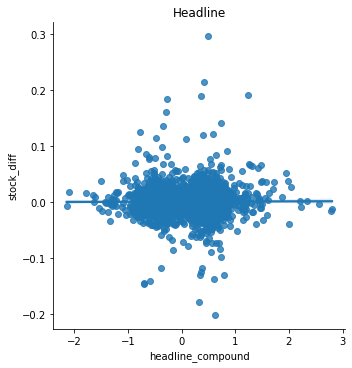

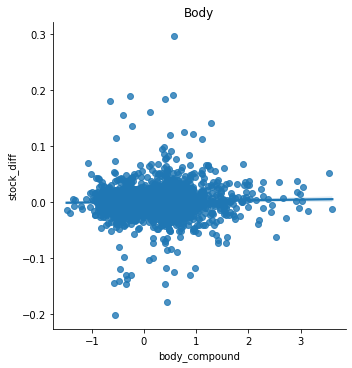

In [51]:
draw_lmplot(news_stock_diff_headline_df, 'headline_compound', 'stock_diff', 'Headline')
draw_lmplot(news_stock_diff_body_df, 'body_compound', 'stock_diff', 'Body')
draw_lmplot(news_stock_diff_nonzero_df, 'headline_compound', 'body_compound', 'Headline / Body Correlation')

### Scatter Plot (Sector)

* All sectors on the same plot
* Each sector for one plot

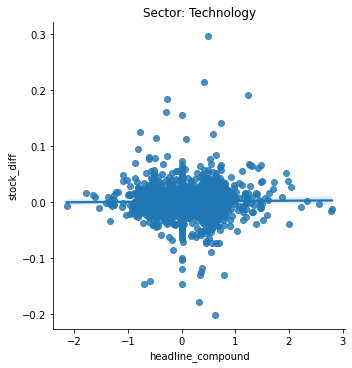

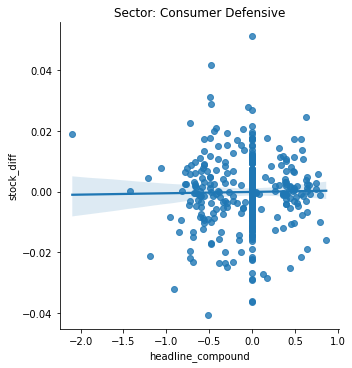

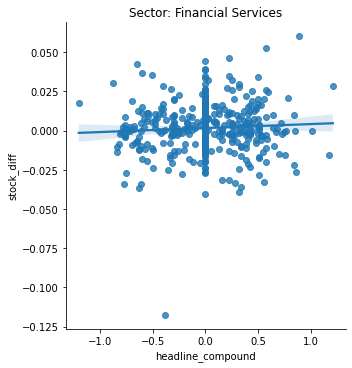

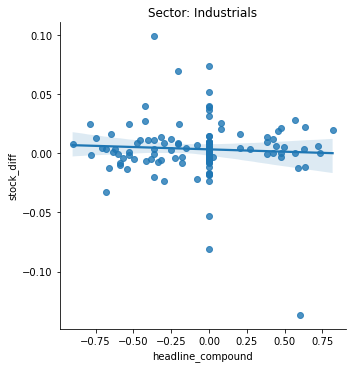

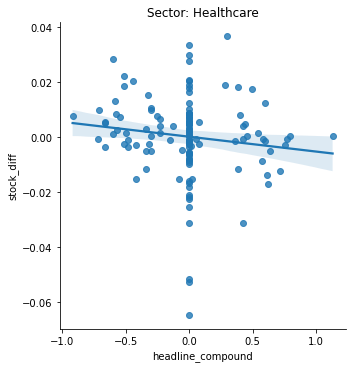

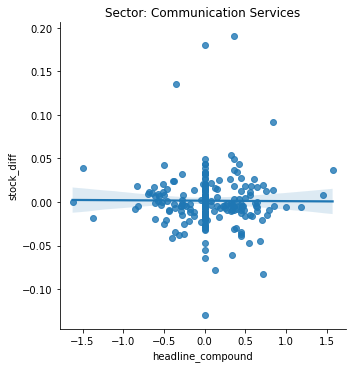

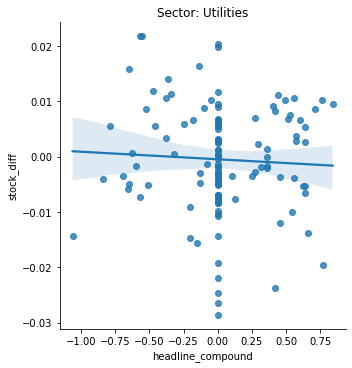

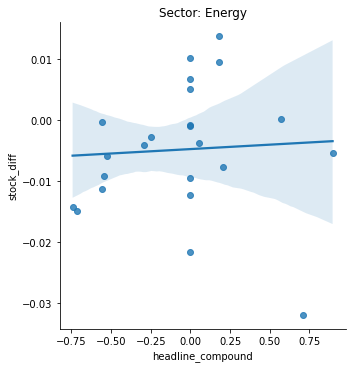

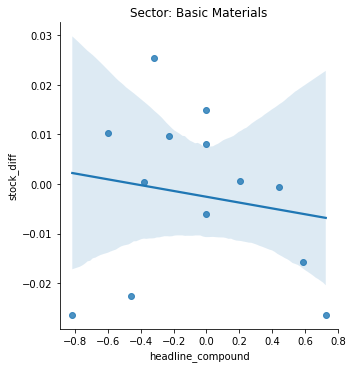

In [52]:
draw_lmplot(news_stock_diff_df, 'headline_compound', 'stock_diff', 'Headline - All Sectors', hue='sector')
sector_list = news_stock_diff_df['sector'].unique()
for sector in sector_list:
    title = 'Sector: ' + sector
    plot_sector_df = news_stock_diff_df[news_stock_diff_df['sector'] == sector]
    draw_lmplot(plot_sector_df, 'headline_compound', 'stock_diff', title)

## Observe tweet dataset with 5 tech companies


### Dictionary for Company Name and Ticker Symbol

In [53]:
tweet_company_symbol_dict = {'AAPL': 'Apple',
                             'GOOG': 'Google',
                             'AMZN': 'Amazon',
                             'TSLA': 'Tesla',
                             'MSFT': 'Microsoft'}

# Extract company name and ticker symbol as lists
tweet_companies_list = list(tweet_company_symbol_dict.values())
tweet_companies_symbol_list = list(tweet_company_symbol_dict.keys())

### Tweet Dataset Preprocessing

1. Thresholding (Like, Retweet, Comment): ``tweet_threshold_df``
2. Convert date format (from timestamp to datetime)
3. Assign company name: ``tweet_company_df``

In [54]:
# Thresholding
LIKE_THRESHOLD = 10
RETWEET_THRESHOLD = 10
COMMENT_THRESHOLD = 0

tweet_threshold_df = tweet_df[(tweet_df['like_num'] >= LIKE_THRESHOLD) & (tweet_df['retweet_num'] >= RETWEET_THRESHOLD) & (tweet_df['comment_num'] >= COMMENT_THRESHOLD)]

# Convert time format
tweet_threshold_df['post_date'] = pd.to_datetime(tweet_threshold_df['post_date'], unit='s').apply(lambda x: x.date())

# Assign company name
tweet_company_query = '''
SELECT name.company_name AS company, name.ticker_symbol AS symbol, tweet.body, tweet.post_date AS date, tweet.comment_num, tweet.retweet_num, tweet.like_num
  FROM tweet_company_relation_df AS relation
JOIN tweet_threshold_df AS tweet 
  ON relation.tweet_id = tweet.tweet_id
JOIN tweet_company_symbol_df AS name
  ON relation.ticker_symbol = name.ticker_symbol
'''

tweet_company_df = ps.sqldf(tweet_company_query)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### Wordcloud

* Make a list (remove words related to company name)
* Call wordcloud drawing function (above)

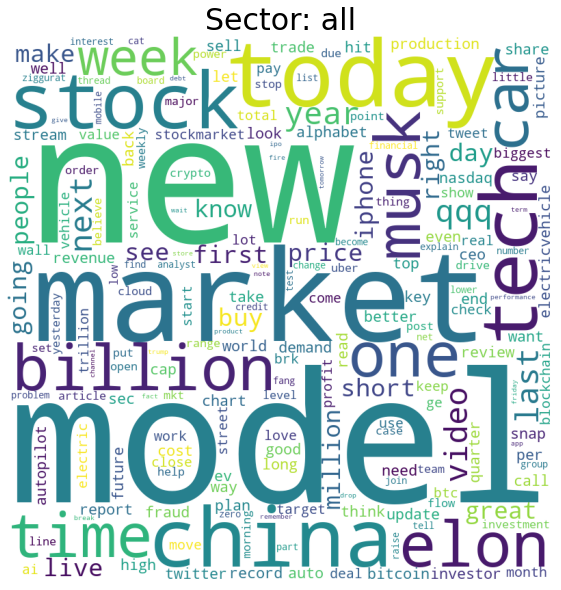

In [55]:
# Manually tune
removal_word_list = tweet_companies_list.copy()
removal_word_list.extend(tweet_companies_symbol_list)
removal_word_list.extend(['http', 'https', 'googl', 'fb', 'tslaq'])
draw_wordcloud(tweet_company_df, 'body', removal_word_list, 'all')

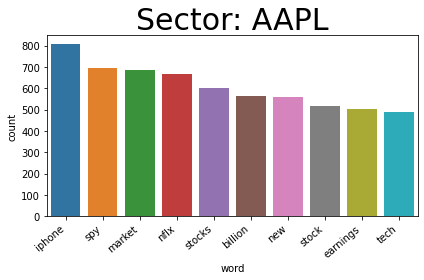

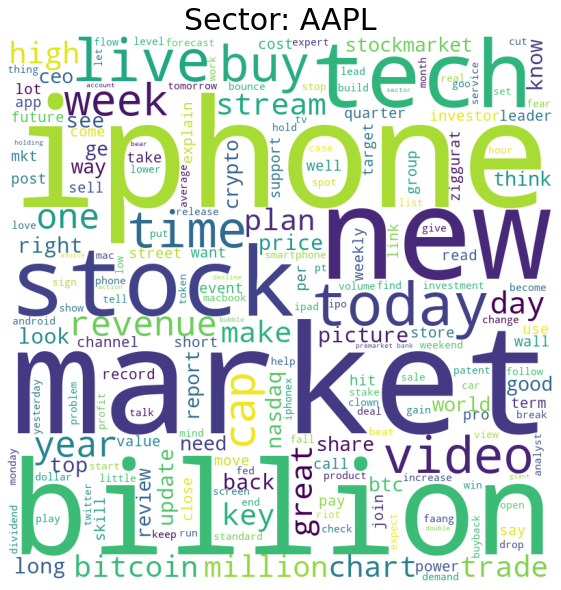

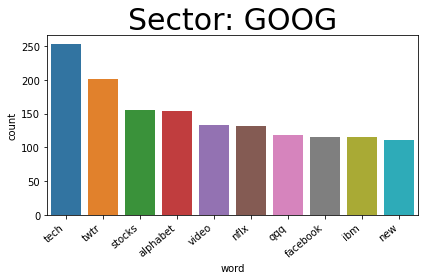

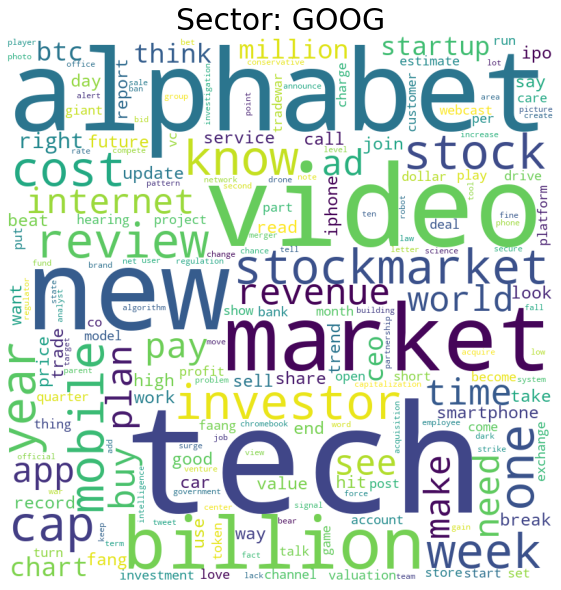

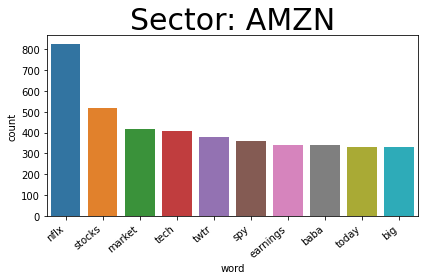

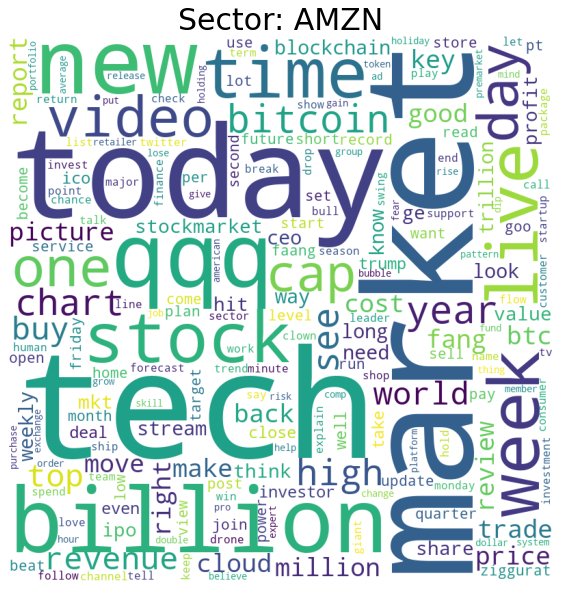

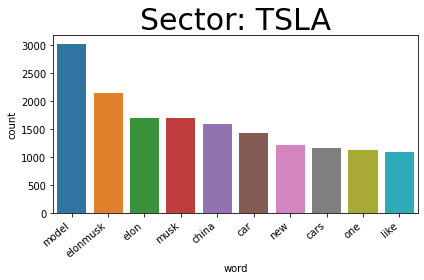

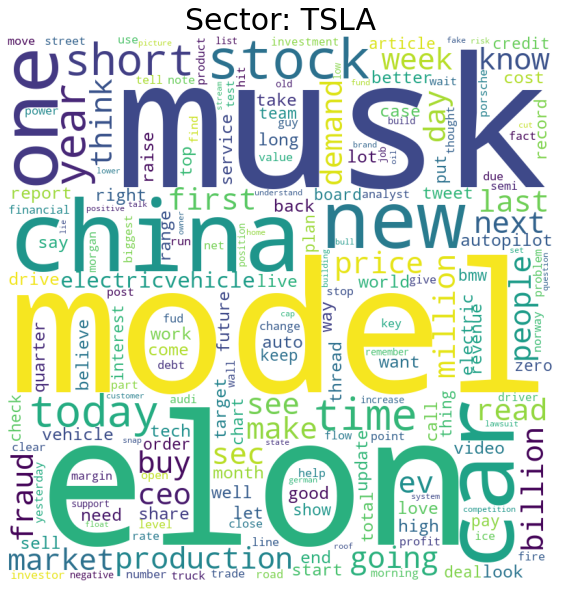

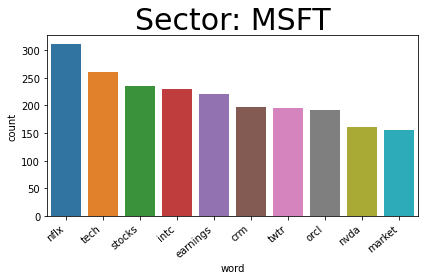

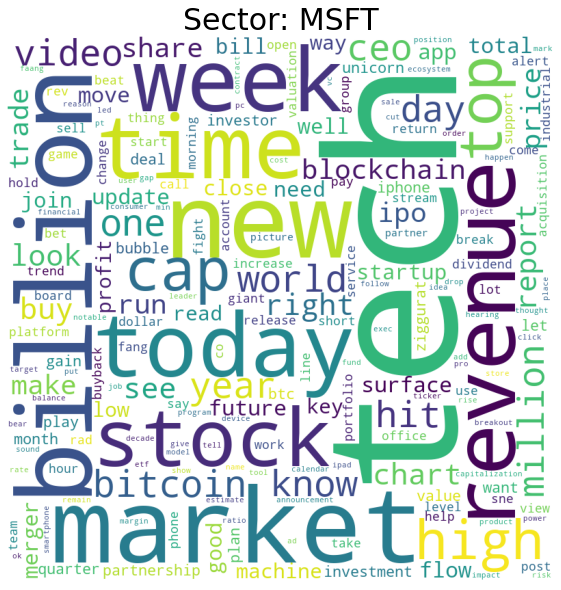

In [56]:
for symbol in tweet_companies_symbol_list:
    tweet_each_company_df = tweet_company_df[tweet_company_df['symbol'] == symbol]
    draw_wordcloud(tweet_each_company_df, 'body', removal_word_list, symbol)

### Sentiment Analysis

> It takes 6.5 minutes for 40000 sentences


In [57]:
def sentimentAnalysisTweet(df):
    sia = nltk.sentiment.SentimentIntensityAnalyzer()
    result = sia.polarity_scores(df['body'])
    df['body_compound'] = result['compound']
    return df

In [58]:
tweet_company_df = tweet_company_df.apply(sentimentAnalysisTweet, axis=1)

In [65]:
tweet_company_compound_df = tweet_company_df[['date', 'company', 'body_compound', 'symbol', 'comment_num', 'retweet_num', 'like_num']].groupby(['date', 'company', 'symbol']).sum().reset_index()

In [67]:
tweet_company_compound_df

date     company symbol  ...  comment_num  retweet_num  like_num
0    2015-01-01  Amazon.com   AMZN  ...           38          252       114
1    2015-01-01       apple   AAPL  ...           24          278       148
2    2015-01-02       apple   AAPL  ...            0          916        59
3    2015-01-03       apple   AAPL  ...            0           11        10
4    2015-01-04  Google Inc   GOOG  ...           22          247       120
...         ...         ...    ...  ...          ...          ...       ...
7508 2019-12-30       apple   AAPL  ...           77          196       553
7509 2019-12-31  Amazon.com   AMZN  ...            2           29        51
7510 2019-12-31   Microsoft   MSFT  ...           20          144       318
7511 2019-12-31   Tesla Inc   TSLA  ...          223          502      3882
7512 2019-12-31       apple   AAPL  ...           46          125       661

[7513 rows x 7 columns]

### Stock Difference

In [68]:
stock_diff_tweet_df = stock_diff_sector_df.loc[stock_diff_sector_df['symbol'].isin(tweet_companies_symbol_list)]
stock_diff_tweet_df['date'] = pd.to_datetime(stock_diff_tweet_df['date'])
tweet_company_compound_df['date'] = pd.to_datetime(tweet_company_compound_df['date'])

merge_tweet_stock_diff_query = '''
SELECT tweet.date, tweet.company, tweet.symbol, tweet.body_compound, stock.diff AS stock_diff
  FROM tweet_company_compound_df AS tweet
JOIN stock_diff_tweet_df AS stock
  ON tweet.date = stock.date AND tweet.symbol = stock.symbol
'''
tweet_stock_diff_df = ps.sqldf(merge_tweet_stock_diff_query)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
tweet_stock_diff_df

date     company symbol  body_compound  stock_diff
0     2015-01-05 00:00:00.000000  Google Inc   GOOG         0.5782   -0.023177
1     2015-01-05 00:00:00.000000   Microsoft   MSFT         0.5782   -0.014571
2     2015-01-05 00:00:00.000000       apple   AAPL         0.9214    0.000094
3     2015-01-06 00:00:00.000000  Amazon.com   AMZN         0.1027    0.010600
4     2015-01-06 00:00:00.000000       apple   AAPL        -0.3361    0.014022
...                          ...         ...    ...            ...         ...
2898  2019-12-26 00:00:00.000000       apple   AAPL         0.3244   -0.000379
2899  2019-12-30 00:00:00.000000  Amazon.com   AMZN         0.4404    0.000514
2900  2019-12-30 00:00:00.000000  Google Inc   GOOG         0.0000    0.000659
2901  2019-12-30 00:00:00.000000   Microsoft   MSFT         0.0000    0.000698
2902  2019-12-30 00:00:00.000000       apple   AAPL         4.8939    0.007307

[2903 rows x 5 columns]

### Scatter Plot (Overall)

* Drop rows with zero compound score
* Compound Score / Daily Stock Price Difference (All)

In [70]:
tweet_stock_diff_nonzero_df = tweet_stock_diff_df[tweet_stock_diff_df['body_compound'] != 0]

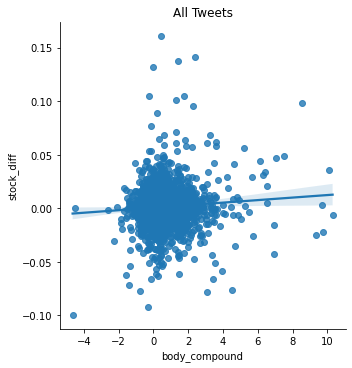

In [72]:
draw_lmplot(tweet_stock_diff_nonzero_df, 'body_compound', 'stock_diff', 'All Tweets')

### Scatter Plot (Sector)

* All sectors on the same plot
* Each sector for one plot

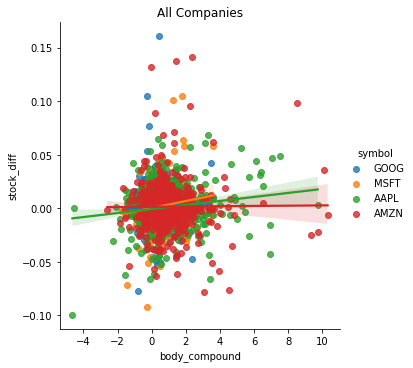

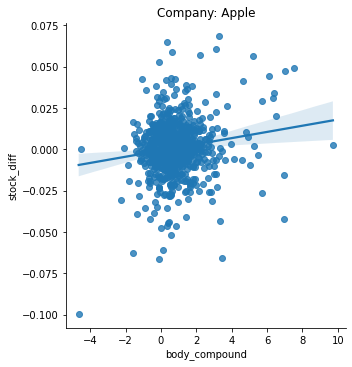

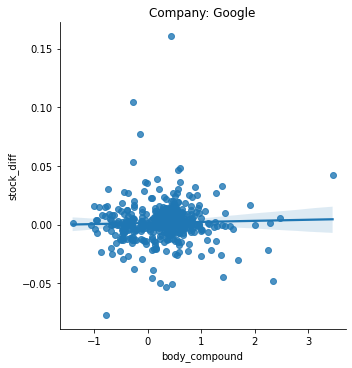

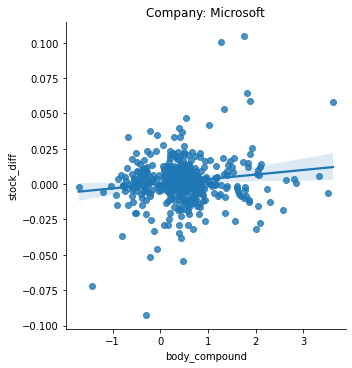

In [73]:
draw_lmplot(tweet_stock_diff_nonzero_df, 'body_compound', 'stock_diff', 'All Companies', hue='symbol')
for symbol in tweet_companies_symbol_list:
    title = 'Company: ' + tweet_company_symbol_dict[symbol]
    plot_company_df = tweet_stock_diff_nonzero_df[tweet_stock_diff_nonzero_df['symbol'] == symbol]
    draw_lmplot(plot_company_df, 'body_compound', 'stock_diff', title)

# Want to Analyze

* Correlation between comment number (with weight) per day and end stock price
* word cloud for most comment word
* Correlation between the dramatic stock price change and the comment number (with weight)

### Correlation between headline and stock price

* Nearly independent

### 20211124 TODO

* Sentimental Analysis: Add different types of companies
  * e.g. financial, entertainment...
  * Plot together and plot separately
* For companies that changes stocks price dramatically, check the correlation between its change and compound score
* Make wordcloud for the most common words in headline and short description
* Use same analysis with Tweet dataset



### 20211202 TODO

* Further analysis of Wordcloud
  * With sector
  * Use dataset from Johnny (categories based on stock movement)
  * See the actual texts with special words (e.g. chocolate, wedding...)
* Compound Score (headline) vs stock price change
  * With longer time (weekly, monthly)
* For ML model
  * Use SP 500 first
  * Then use dataframe from Cici
  * quartly stock price change vs sum of compound score
* Tweet
  * Filter with like number
* Stock dataset
  * Use historicl dataset (better, with more data)
  * Replace the original sector with this one


# Data for Further Model Training

#### Modeling without sentiment analysis

|company_id (5 companies) | indicator feature | label (stock movement between this month and next month)|
|---------|--------|----|
|company 1 month 1 | [....] | 1|
|company 2 month 3 | [....] | -1|

# Challenge and Improvement

## News Dataset

* Filter the name from headline

> Difficult to decide which name should be used to filter, such as Johnson & Johnson, can be written as "J&J", "J.&J.", "Johnson & Johnson"
